# OpenAI Assistant

## Exercise 1

Create an assistant to answer a topic of your choosing:
 - Upload a file of your interest
 - Add Instructions to the prompt
 - Use the assistant in Playground mode

 https://platform.openai.com/playground/assistants

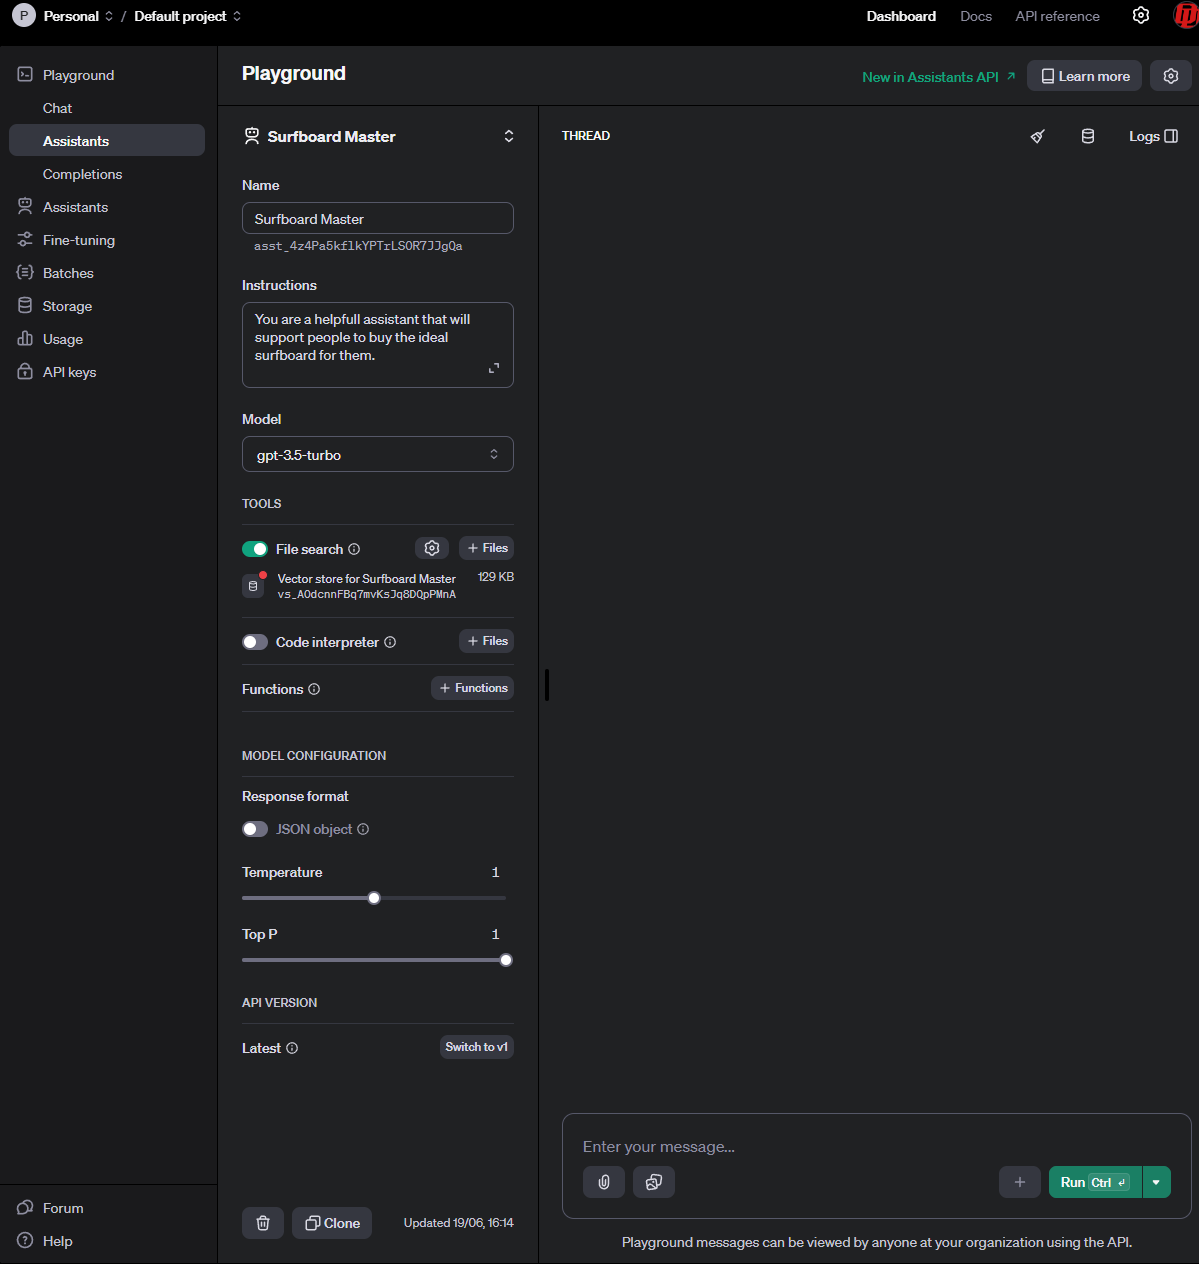

## Exercise 2

Talk to your assistant via the API

https://platform.openai.com/docs/assistants/overview

In [ ]:
import openai


api_key = ''
openai.api_key = api_key

# ID of your Surfboard Master 
assistant_id = ''

# Function to interact with the Surfboard Master
def ask_Surfboard_Master(prompt):
    response = openai.Completion.create(
        model=assistant_id,
        prompt=f"Conversation with Surfboard Master\n{prompt}",
    )
    
    return response.choices[0].text.strip()

# Example conversation with the Surfboard Master
conversation_start = "I want to buy a new surfboard, can you support me?"
response = ask_Surfboard_Master(conversation_start)

print("User: ", conversation_start)
print("Surfboard Master: ", response)

## Exercise 3

Create an assistant that will call a weather API, given the user's answer and return the proper answer.

See the documentation of the weather API here: https://open-meteo.com/en/docs

In [1]:
import requests

def get_weather_forecast(latitude, longitude):
    base_url = "https://api.open-meteo.com/v1/forecast"
    params = {
        "latitude": latitude,
        "longitude": longitude,
        "hourly": "temperature_2m"
    }
    response = requests.get(base_url, params=params)
    return response.json()

# Example usage:
forecast = get_weather_forecast(52.52, 13.41)
print(forecast)

{'latitude': 52.52, 'longitude': 13.419998, 'generationtime_ms': 0.06699562072753906, 'utc_offset_seconds': 0, 'timezone': 'GMT', 'timezone_abbreviation': 'GMT', 'elevation': 38.0, 'hourly_units': {'time': 'iso8601', 'temperature_2m': '°C'}, 'hourly': {'time': ['2024-06-17T00:00', '2024-06-17T01:00', '2024-06-17T02:00', '2024-06-17T03:00', '2024-06-17T04:00', '2024-06-17T05:00', '2024-06-17T06:00', '2024-06-17T07:00', '2024-06-17T08:00', '2024-06-17T09:00', '2024-06-17T10:00', '2024-06-17T11:00', '2024-06-17T12:00', '2024-06-17T13:00', '2024-06-17T14:00', '2024-06-17T15:00', '2024-06-17T16:00', '2024-06-17T17:00', '2024-06-17T18:00', '2024-06-17T19:00', '2024-06-17T20:00', '2024-06-17T21:00', '2024-06-17T22:00', '2024-06-17T23:00', '2024-06-18T00:00', '2024-06-18T01:00', '2024-06-18T02:00', '2024-06-18T03:00', '2024-06-18T04:00', '2024-06-18T05:00', '2024-06-18T06:00', '2024-06-18T07:00', '2024-06-18T08:00', '2024-06-18T09:00', '2024-06-18T10:00', '2024-06-18T11:00', '2024-06-18T12:00'

In [ ]:
import openai
import requests

# Set your OpenAI API key
openai.api_key = ''


# Function to interact with the weather API
def get_weather(city):
    try:
        # Replace with your actual weather API endpoint and API key
        url = f'https://api.open-meteo.com/v1/forecast?city={city}'
        response = requests.get(url)
        
        # Check if response is successful (status code 200)
        if response.status_code == 200:
            data = response.json()
            
            # Example: Extract relevant weather information (temperature and description)
            temperature = data.get('forecast', {}).get('temperature_2m', {}).get('value')
            weather_description = data.get('forecast', {}).get('weather', {}).get('description')
            
            if temperature is not None and weather_description is not None:
                return f"The weather in {city} is {temperature}°C with {weather_description}."
            else:
                return f"Error: Weather information not found for {city}."
        
        else:
            return f"Error: Failed to retrieve weather data. Status code: {response.status_code}"
    
    except Exception as e:
        return f"Error: {str(e)}"

# Function to interact with the assistant
def ask_weather_assistant(prompt):
    try:
        response = openai.Completion.create(
            model="gpt-3.5-turbo-instruct",  # Adjust the model based on your assistant type and access
            prompt=prompt,
        )
        
        return response.choices[0].text.strip()
    
    except Exception as e:
        return f"Error: {str(e)}"

# Example conversation with the weather assistant
conversation_start = "What's the weather like in New York?"
user_response = ask_weather_assistant(conversation_start)
weather_response = get_weather("New York")

print("User: ", conversation_start)
print("Weather Assistant: ", user_response)
print("Weather API: ", weather_response)

### If you want to, there is a hint here:

OpenAI Chatbots / Assistants have a way to respond in json format. 

Explore the function calling functionality